# Introduction to the problem

# Outline of the session. What will we learn?

# Using Jupyter
Quick intro to Jupyter Lab interface

# Astropy Main ingredients

## Astropy Units and Quantities


In [217]:
from astropy import units as u
import numpy as np

42.0 * u.meter  

<Quantity 42. m>

In [218]:
a = [1, 2, 3, 4, 5, 6]*u.deg

In [219]:
a + 24*u.arcsec

<Quantity [1.00666667, 2.00666667, 3.00666667, 4.00666667, 5.00666667,
           6.00666667] deg>

In [220]:
a.to('arcsec')

<Quantity [ 3600.,  7200., 10800., 14400., 18000., 21600.] arcsec>

In [221]:
np.mean(a)

<Quantity 3.5 deg>

In [222]:
print(v.value)
print(v.unit)

NameError: name 'v' is not defined

In [ ]:
Emin = 100*u.keV
Emin

In [ ]:
Emax = 10*u.MeV
Emax

In [ ]:
Emax/Emin

In [6]:
np.log(Emax/Emin)

NameError: name 'np' is not defined

In [7]:
v = 100 * u.meter / u.second
v

<Quantity 100. m / s>

In [8]:
v.to(u.pc/u.yr)

<Quantity 1.02271217e-07 pc / yr>

An alternative way to create a `Quantity` object, which is much faster for large datasets

In [12]:
x = u.Quantity(np.arange(10), unit='m')
x

<Quantity [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.] m>

Introducing constants. A full list of available constants is here: http://docs.astropy.org/en/stable/constants/#module-astropy.constants

In [13]:
from astropy import constants as const
# speed of light
speed_of_light = const.c
speed_of_light

<<class 'astropy.constants.codata2018.CODATA2018'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2018'>

In [14]:
# distance sun - earth
distance_sun = 1 * u.au

# time
time_sun = distance_sun / speed_of_light
time_sun

<Quantity 3.33564095e-09 AU s / m>

In [15]:
time_sun.to('min')

<Quantity 8.3167464 min>

In [16]:
print(f"SI: {distance_sun.si}")
print(f"CGS: {distance_sun.cgs}")

SI: 149597870700.0 m
CGS: 14959787070000.0 cm


### ⛏ Exercise
Assuming that the distance to the Galactic Center is 8 kpc, compute the time it takes for light to travel from the Galactic Center to Earth in years.

In [17]:
# distance to GC
distance_gc = 8 * u.kpc

# time
time_gc = distance_gc / speed_of_light
time_gc.to(u.yr)

<Quantity 26092.51021734 yr>

## Astropy Coordinates

In [18]:
from astropy.coordinates import Angle

Angle(24*u.deg)

<Angle 24. deg>

In [19]:
a = Angle(1*u.deg)
print(a.deg)
print(a.arcmin)
print(a.arcsec)

1.0
60.0
3600.0


In [20]:
angles = Angle([1, 4, 6, 15, -3, 2, 10, 2, 0]*u.deg)
angles

<Angle [ 1.,  4.,  6., 15., -3.,  2., 10.,  2.,  0.] deg>

In [21]:
angles.to('arcmin')

<Angle [  60.,  240.,  360.,  900., -180.,  120.,  600.,  120.,    0.] arcmin>

In [22]:
angles.sort()
angles.arcmin

array([-180.,    0.,   60.,  120.,  120.,  240.,  360.,  600.,  900.])

In [23]:
angles.sum()

<Angle 37. deg>

Let's work with coordinates

In [24]:
from astropy.coordinates import SkyCoord
c = SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs')
c

<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>

Multiple ways to initialize the coordinates

In [25]:
c = SkyCoord(10.625, 41.2, frame='icrs', unit='deg')
c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
c = SkyCoord('00h42.5m', '+41d12m')
c = SkyCoord('00 42 30 +41 12 00', unit=(u.hourangle, u.deg))
c = SkyCoord('00:42.5 +41:12', unit=(u.hourangle, u.deg))

The coordinates can be accessed by R.A. or Declination, and can be converted to different units.

In [26]:
print(c.ra.arcmin)
print(c.dec.arcsec)
print(c.ra.radian)
print(c.ra.hms)
print(c.dec.dms)

637.5
148320.0
0.18544123302439752
hms_tuple(h=0.0, m=42.0, s=30.000000000000426)
dms_tuple(d=41.0, m=12.0, s=1.0231815394945443e-11)


It also accespts arrays

In [27]:
cs = SkyCoord(np.random.uniform(0, 180, 100)*u.deg, np.random.uniform(-90, 90, 100)*u.deg, frame='icrs')
cs

<SkyCoord (ICRS): (ra, dec) in deg
    [(151.09751505,  16.3899239 ), (127.77792177, -54.76580095),
     ( 91.36636695,   4.40723231), (109.42431825,  85.4724803 ),
     (100.6720047 ,  86.5236251 ), ( 24.24643337, -78.27750658),
     ( 56.69975715, -67.5279936 ), ( 36.43804337, -11.54742096),
     (172.67450337,  73.17568556), (150.07673234,  -9.88141243),
     (126.38018602, -48.75169931), (146.17396663, -15.46234571),
     ( 41.51580047,   8.32968804), (123.90969634, -80.04948608),
     (165.92113401, -73.65183016), (123.56487353,  50.57799602),
     (169.50399491,  15.18014373), (102.87121106,   3.28549716),
     ( 15.75214515,  51.44542577), ( 32.5436332 ,   0.99307619),
     ( 94.51231317, -24.01785422), ( 69.94827415, -61.17609779),
     (126.81501035, -58.73706132), ( 47.65297134,   5.18692839),
     ( 63.78173471,  64.1312269 ), ( 93.09366103, -44.93141487),
     ( 91.55595478,  12.84342073), (176.30996211, -42.74493987),
     ( 65.86997422, -47.58093879), ( 96.61073628, -88.8

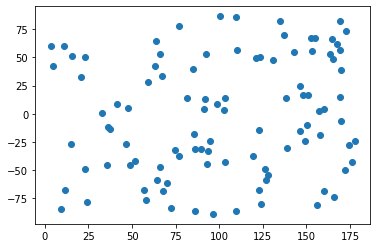

In [28]:
import matplotlib.pyplot as plt
plt.plot(cs.ra, cs.dec, 'o')

Coordinate transformation

In [29]:
c_icrs = SkyCoord(ra=10.68458*u.degree, dec=41.26917*u.degree, frame='icrs')
c_icrs.galactic  

<SkyCoord (Galactic): (l, b) in deg
    (121.17424181, -21.57288557)>

Distance between two coordinates

In [30]:
c1 = SkyCoord(ra=10*u.degree, dec=9*u.degree, frame='icrs')
c2 = SkyCoord(ra=11*u.degree, dec=10*u.degree, frame='fk5')
c1.separation(c2)  # Differing frames handled correctly  

<Angle 1.40453359 deg>

Search coordinates by source name

In [31]:
SkyCoord.from_name("PSR J1012+5307")  


<SkyCoord (ICRS): (ra, dec) in deg
    (153.1393106, 53.1173746)>

### ⛏ Exercise
Find the separation in arcmin between M51 and the point of the Sky in Galactic Coordinates l=10h25m47.0s and b=+10deg. Be careful setting the coordinate frame of reference.

In [32]:
m51_coord = SkyCoord.from_name("M51")  
point_coord = SkyCoord(l='10h25m47.0s', b=10*u.degree, frame='galactic')
m51_coord, point_coord
print(m51_coord.separation(point_coord).to('arcmin'))

4040.44arcmin


# Vizier Queries
https://ioa-coding.github.io/codecorners/2017_10_24_CC02_astroquery.html  
https://astroquery.readthedocs.io/en/latest/vizier/vizier.html

## Table Discover

In [33]:
from astroquery.vizier import Vizier
catalog_list = Vizier.find_catalogs('carmenes dwarf')
['{}: {}'.format(k, v.description) for k, v in catalog_list.items()]

['J/A+A/577/A128: CARMENES input catalogue of M dwarfs. I (Alonso-Floriano+, 2015)',
 'J/A+A/597/A47: CARMENES input catalogue of M dwarfs II (Cortes-Contreras+ 2017)',
 'J/A+A/609/A117: CARMENES radial velocity curves of 7 M-dwarf (Trifonov+, 2018)',
 'J/A+A/609/L5: HD147379 b velocity curve (Reiners+, 2018)',
 'J/A+A/612/A49: 324 CARMENES M dwarfs velocities (Reiners+, 2018)',
 'J/A+A/614/A76: CARMENES input catalogue of M dwarfs. III. (Jeffers+, 2018)',
 'J/A+A/614/A122: Radial-velocity of CARMENES M dwarfs (Tal-Or+, 2018)',
 'J/A+A/615/A6: Photospheric parameters of CARMENES stars (Passegger+, 2018)',
 'J/A+A/618/A115: HD 147379 radial velocities (Kaminski+, 2018)',
 'J/A+A/619/A32: CARMENES SB2 orbital parameters (Baroch+, 2018)',
 'J/A+A/620/A171: Radial velocities of GJ 3779 and GJ 1265 (Luque+, 2018)',
 'J/A+A/621/A126: CARMENES input catalogue of M dwarfs. IV. (Diez Alonso+ 2019)',
 'J/A+A/622/A153: GJ 4276 radial velocity curve (Nagel+, 2019)',
 'J/A+A/623/A44: CARMENES M-dwa

In [34]:
Vizier.ROW_LIMIT = -1
cat = Vizier.get_catalogs('J/A+A/612/A49')[0]

In [35]:
cat

Seq,ID,GJ,Name,SpType,Jmag,Mass,RV,Per,r_Per,l_vsini,vsini,l_Pvsini,Pvsini,l_i,i,logLHa_Lbol,SimbadName,_RA,_DE
,,,,,mag,Msun,km / s,d,,,km / s,,d,,deg,[-],,deg,deg
int16,str11,str6,str23,str4,float32,float32,float64,float32,str6,str1,float32,str1,float32,str2,int16,float32,str23,float64,float64
1,J00051+457,2,GJ 2,M1.0,6.70,0.56,-0.392,--,,<,2.0,>,13.30,,--,--,GJ 2,1.29537,45.78657
2,J00067-075,1002,GJ 1002,M5.5,8.32,0.11,-40.058,--,,<,2.0,>,3.50,,--,-4.83,GJ 1002,1.67999,-7.53806
3,J00162+198E,1006B,LP 404-062,M4.0,8.89,0.30,-1.457,104.00,Irw11,<,2.0,>,7.40,<=,90,--,LP 404-062,4.06730,19.86402
4,J00183+440,15A,GX And,M1.0,5.25,0.45,11.671,--,,<,2.0,>,10.50,,--,--,GX And,4.59535,44.02295
5,J00184+440,15B,GQ And,M3.5,6.79,0.16,10.876,--,,<,2.0,>,4.60,,--,--,GQ And,4.60760,44.02725
6,J00286-066,1012,GJ 1012,M4.0,8.04,0.39,-12.531,--,,<,2.0,>,9.10,,--,--,GJ 1012,7.16444,-6.66366
7,J00389+306,26,Wolf 1056,M2.5,7.45,0.47,-0.499,--,,<,2.0,>,11.10,,--,--,Wolf 1056,9.74602,30.61622
8,J00570+450,,G 172-030,M3.0,8.10,0.39,6.396,--,,<,2.0,>,9.30,,--,--,G 172-030,14.26122,45.08605


In [36]:
cat.info()

<Table length=324>
    name     dtype   unit   format                             description                             n_bad
----------- ------- ------ ------- ------------------------------------------------------------------- -----
        Seq   int16                                                                  Sequential number     0
         ID   str11                                                                   ID (JHHMMm+DDmA)     0
         GJ    str6                                                                            GJ name     0
       Name   str23                                                                               Name     0
     SpType    str4                                                                   MK spectral type     0
       Jmag float32    mag {:5.2f}                                                         J magnitude     0
       Mass float32   Msun {:5.2f}                                                                Mass     0


In [37]:
cat.info('stats')

<Table length=324>
    name      mean     std      min      max   n_bad
----------- -------- -------- -------- ------- -----
        Seq    162.5  93.5303        1     324     0
         ID       --       --       --      --     0
         GJ       --       --       --      --     0
       Name       --       --       --      --     0
     SpType       --       --       --      --     0
       Jmag  7.81867  1.18761      4.2   11.35     0
       Mass 0.369877 0.168519     0.07    0.74     0
         RV -3.34948  31.2111 -120.236 105.798     0
        Per  41.0267  46.5482     0.27   165.1   261
      r_Per       --       --       --      --     0
    l_vsini       --       --       --      --     0
      vsini  4.56543  8.11359        2    59.8     0
   l_Pvsini       --       --       --      --     0
     Pvsini  8.02358  4.34176     0.09    16.1     0
        l_i       --       --       --      --     0
          i  80.4531  18.7316       18      90   260
logLHa_Lbol -4.03627 0.4190

### ⛏ Exercise
Get the coordinates from catalog in 

## Query a Simbad object

In [38]:
from astroquery.vizier import Vizier
result = Vizier.query_object("NGC 6670")
print(result)

TableList with 200 tables:
	'0:I/252/out' with 8 column(s) and 32 row(s) 
	'1:I/254/out' with 10 column(s) and 4 row(s) 
	'2:I/259/tyc2' with 10 column(s) and 1 row(s) 
	'3:I/261/fonac' with 9 column(s) and 1 row(s) 
	'4:I/267/out' with 16 column(s) and 48 row(s) 
	'5:I/271/out' with 11 column(s) and 28 row(s) 
	'6:I/275/ac2002' with 9 column(s) and 1 row(s) 
	'7:I/280B/ascc' with 12 column(s) and 1 row(s) 
	'8:I/284/out' with 14 column(s) and 72 row(s) 
	'9:I/294A/ucac2bss' with 12 column(s) and 1 row(s) 
	'10:I/297/out' with 19 column(s) and 75 row(s) 
	'11:I/305/out' with 11 column(s) and 68 row(s) 
	'12:I/312/sample' with 13 column(s) and 3 row(s) 
	'13:I/317/sample' with 13 column(s) and 63 row(s) 
	'14:I/319/xpm' with 25 column(s) and 23 row(s) 
	'15:I/322A/out' with 24 column(s) and 7 row(s) 
	'16:I/324/igsl3' with 18 column(s) and 61 row(s) 
	'17:I/329/urat1' with 16 column(s) and 35 row(s) 
	'18:I/337/gaia' with 14 column(s) and 47 row(s) 
	'19:I/337/tgas' with 20 column(s) an

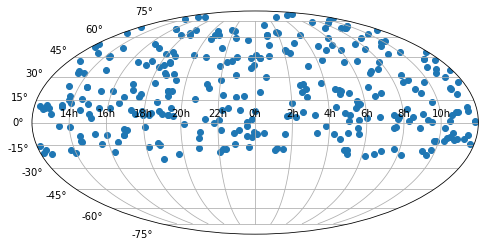

In [40]:
from astropy.coordinates import SkyCoord

ra = Angle(cat['_RA'])
de = Angle(cat['_DE'])
ra = ra.wrap_at('180d')

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.rad, de.rad)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

In [41]:
cat.info

<Table length=324>
    name     dtype   unit   format                             description                             n_bad
----------- ------- ------ ------- ------------------------------------------------------------------- -----
        Seq   int16                                                                  Sequential number     0
         ID   str11                                                                   ID (JHHMMm+DDmA)     0
         GJ    str6                                                                            GJ name     0
       Name   str23                                                                               Name     0
     SpType    str4                                                                   MK spectral type     0
       Jmag float32    mag {:5.2f}                                                         J magnitude     0
       Mass float32   Msun {:5.2f}                                                                Mass     0


# Quick access to data from the Gaia catalog

The library we will use to get Gaia data is [Astroquery](https://astroquery.readthedocs.io/en/latest/). Astroquery provides `Gaia`, which is an [object that represents a connection to the Gaia database](https://astroquery.readthedocs.io/en/latest/gaia/gaia.html).

We can connect to the Gaia database like this:

In [3]:
from astroquery.gaia import Gaia
Gaia.ROW_LIMIT = -1

## Direct query with `astroquery` function

First we will use the `Gaia.query_object_async` function, which easily connects to the Gaia catalog. Although it does not give extensive functionality to filter the query, it is a first step.

In [8]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt

To do a basic query on the *Gaia* catalogue we just need a pointing centre and the (width, height), or the radius, of the region of interest. This is a clear case where you could build a python function to retrieve data based only on those four parameters.

Here we also include the Jupyter Magic `%time` that will report the execution time of a particular line of code to run. The Magic `%%time` could also be used to report the execution time of the whole cell.

In [42]:
ra0 = 130.025
de0 = 19.98333
w = 3
h = 2
w = 1
h = 1

# Define the region to query
center_coord = SkyCoord(ra=ra0, dec=de0, unit=(u.degree, u.degree), frame='icrs')
width_deg = u.Quantity(w, u.deg)
height_deg = u.Quantity(h, u.deg)

# Run the actual query to the catalogue
%time results1 = Gaia.query_object_async(coordinate=center_coord, width=width_deg, height=height_deg)

INFO: Query finished. [astroquery.utils.tap.core]
CPU times: user 1.85 s, sys: 4.74 ms, total: 1.85 s
Wall time: 5.54 s


## Exploring the resulting query object

In [45]:
results1

dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,Rsun,Rsun,Rsun,Lsun,Lsun,Lsun,
float64,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object
0.009802111759292364,1635721458409799680,Gaia DR2 661322846442390784,661322846442390784,390503307,2015.5,130.01500503419462,0.24888120916348072,19.980541000468566,0.193851471702074,0.828727295033905,0.3350012064562093,2.473804,-4.033231570564601,0.49627960158587475,2.915715928312259,0.33009256613751603,-0.31987226,-0.044802926,-0.18101314,0.28448436,-0.21131124,0.06778818,-0.43846372,0.5705786,-0.209052,-0.29190946,152,0,143,9,0.2536221,141.57729,0.2887893752683439,0.2976614313509744,31,False,0.41604915,1.4433653233017025,0.055630092831848624,0.0069499817,18,11,0.4772171,0,24,False,196,667.7619710548339,2.35694090385261,283.31723,18.626812,21,277.9334255388577,10.65346573347537,26.088545,19.241537,22,720.0270197973655,14.947795683432332,48.169445,17.618547,1.4944853,0,1.6229897,0.6147251,1.0082645,--,--,0,--,--,--,NOT_AVAILABLE,205.53752569203553,32.51753674558407,127.19356700248548,1.5582862225577503,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+661322846442390784
0.013413931870679088,1635721458409799680,Gaia DR2 661322953818940160,661322953818940160,350513172,2015.5,130.01602099428743,0.10531691756732188,19.993747198922243,0.06883691544492751,0.42735110852786373,0.14423369016443197,2.9629078,-2.6048293840171

In [62]:
data0 = results1[['pmra','pmdec', 'parallax']].to_pandas().dropna()


selection = (data0['parallax'] > 3.0) & (data0['parallax'] < 7.7)
data = data0[selection]

data = data0

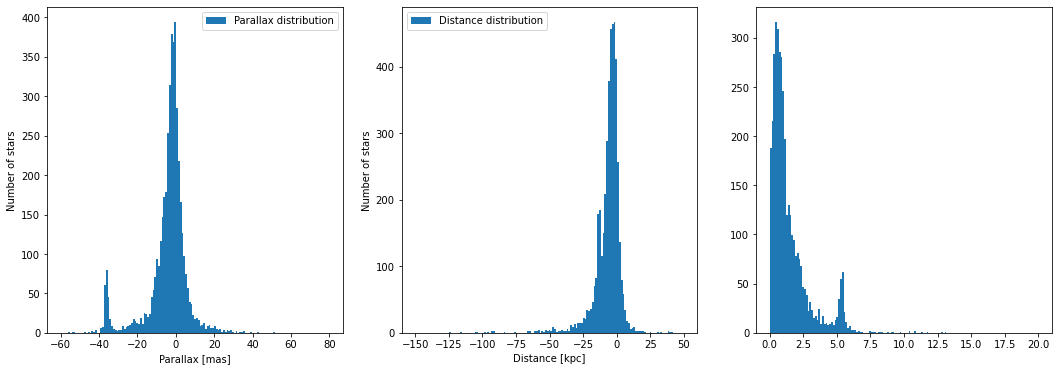

In [63]:


fig, ax = plt.subplots(ncols=3, figsize=(18,6))
ax[0].hist(data['pmra'], bins=np.linspace(-60, 80, 150), label='Parallax distribution')
ax[1].hist(data['pmdec'], bins=np.linspace(-150, 50, 150), label='Distance distribution')
ax[2].hist(data['parallax'], bins=np.linspace(0, 20, 150), label='Distance distribution')

ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('Parallax [mas]')
ax[0].set_ylabel('Number of stars');
ax[1].set_xlabel('Distance [kpc]')
ax[1].set_ylabel('Number of stars');



In [64]:
from astropy.coordinates import Distance
from sklearn.neighbors import DistanceMetric
from sklearn.cluster import DBSCAN
def get_clusters(pos,eps=.005,min_samples=20,sphere=False):   
    if sphere:
        print('Requiring that there are {:d} neighbors in a {:.1f} degree radius '.format(min_samples, np.rad2deg(eps)))
        print('Using haversine 2D distance on sky')
        dist= DistanceMetric.get_metric('haversine').pairwise(pos[:,:2])
    else:
        print('Requiring that there are {:d} neighbors in a {:.1f} pc radius '.format(min_samples, eps*1e3))
        print('Using Euclidean 3D distance')
        dist= DistanceMetric.get_metric('euclidean').pairwise(pos)
    db = DBSCAN(eps=eps, min_samples=min_samples,metric='precomputed').fit(dist)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print('Clusters {0}'.format(n_clusters_))
    return labels,core_samples_mask, n_clusters_

In [65]:
type(data[['pmra','pmdec', 'parallax']])

pandas.core.frame.DataFrame

In [66]:
pos = np.array(data[['pmra','pmdec','parallax']])
pos
np.shape(pos)
#get_clusters(pos, eps=.005, min_samples=20,sphere=True)

(4454, 3)

In [67]:
#dist = DistanceMetric.get_metric('euclidean').pairwise(pos)
#dist

In [68]:
labels, core_samples_mask, n_clusters = get_clusters(pos, eps=1,min_samples=20,sphere=False)

Requiring that there are 20 neighbors in a 1000.0 pc radius 
Using Euclidean 3D distance
Clusters 3


In [78]:
labels

array([-1,  0,  0, ...,  0,  0, -1])

In [72]:
labels, core_samples_mask
np.unique(labels)


array([-1,  0,  1,  2])

In [81]:
data[labels == l]

array([ True, False, False, ..., False, False,  True])

In [70]:
np.count_nonzero(core_samples_mask)

1882

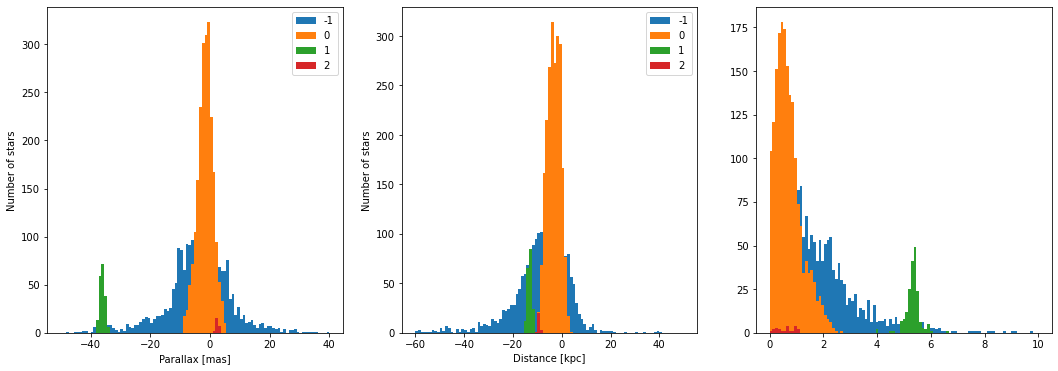

In [88]:


fig, ax = plt.subplots(ncols=3, figsize=(18,6))

for l in np.unique(labels):
    selection = labels == l
    ax[0].hist(data[selection]['pmra'], bins=np.linspace(-50, 40, 100), label=l)
    ax[1].hist(data[selection]['pmdec'], bins=np.linspace(-60, 50, 100), label=l)
    ax[2].hist(data[selection]['parallax'], bins=np.linspace(0, 10, 100), label=l)

ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('Parallax [mas]')
ax[0].set_ylabel('Number of stars');
ax[1].set_xlabel('Distance [kpc]')
ax[1].set_ylabel('Number of stars');



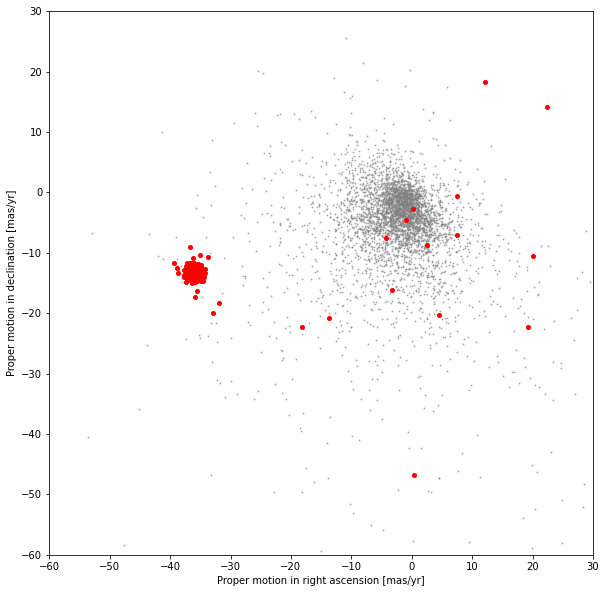

In [158]:
selection = (data['parallax'] > 5.0) & (data['parallax'] < 5.7)
cluster = data[selection]

fig, ax = plt.subplots(ncols=1, figsize=(18,10))
ax.scatter(data['pmra'], data['pmdec'], c='gray', s=1, alpha=0.5);
plt.plot(cluster['pmra'], cluster['pmdec'], '.r', ms=8)

ax.set_aspect('equal')

ax.set_xlabel('Proper motion in right ascension [mas/yr]')
ax.set_ylabel('Proper motion in declination [mas/yr]')

ax.set_xlim(-60, 30)
ax.set_ylim(-60, 30);



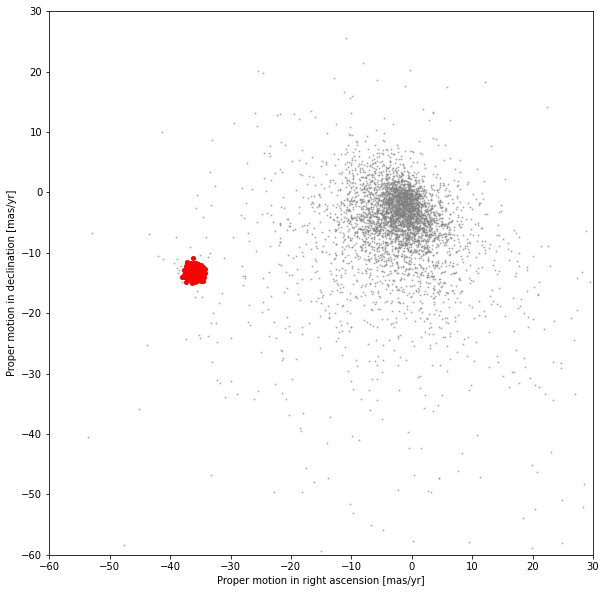

In [93]:
cluster_dbscan = data[labels==1]

fig, ax = plt.subplots(ncols=1, figsize=(18,10))
ax.scatter(data['pmra'], data['pmdec'], c='gray', s=1, alpha=0.5);
plt.plot(cluster_dbscan['pmra'], cluster_dbscan['pmdec'], '.r', ms=8)

ax.set_aspect('equal')

ax.set_xlabel('Proper motion in right ascension [mas/yr]')
ax.set_ylabel('Proper motion in declination [mas/yr]')

ax.set_xlim(-60, 30)
ax.set_ylim(-60, 30);



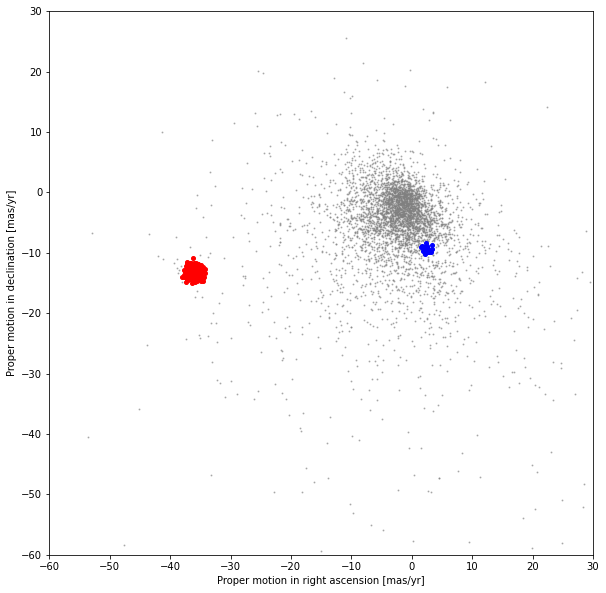

In [97]:
cluster_dbscan = data[labels==2]

fig, ax = plt.subplots(ncols=1, figsize=(18,10))
ax.scatter(data['pmra'], data['pmdec'], c='gray', s=1, alpha=0.5);
plt.plot(cluster_dbscan['pmra'], cluster_dbscan['pmdec'], '.b', ms=8)
cluster_dbscan = data[labels==1]

plt.plot(cluster_dbscan['pmra'], cluster_dbscan['pmdec'], '.r', ms=8)


ax.set_aspect('equal')

ax.set_xlabel('Proper motion in right ascension [mas/yr]')
ax.set_ylabel('Proper motion in declination [mas/yr]')

ax.set_xlim(-60, 30)
ax.set_ylim(-60, 30);




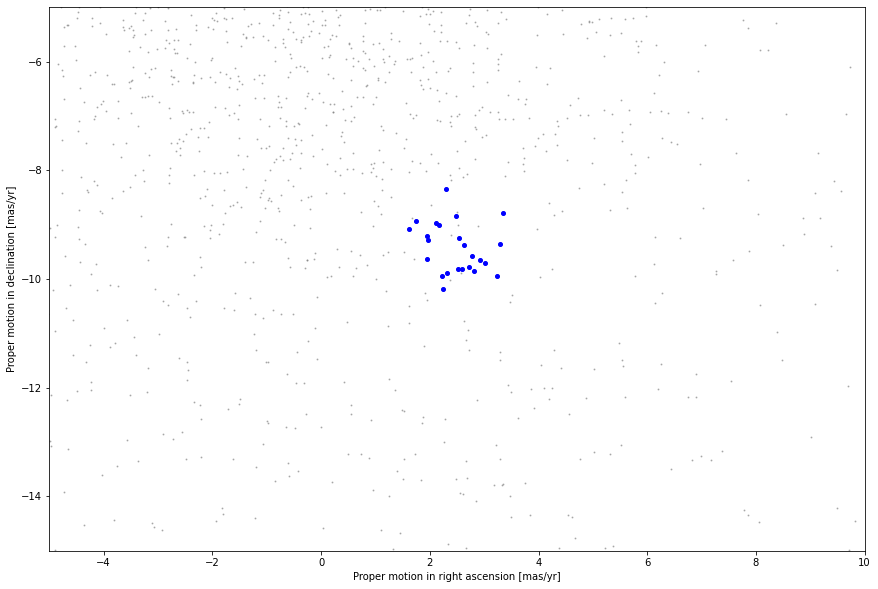

In [95]:
cluster_dbscan = data[labels==2]

fig, ax = plt.subplots(ncols=1, figsize=(18,10))
ax.scatter(data['pmra'], data['pmdec'], c='gray', s=1, alpha=0.5);
plt.plot(cluster_dbscan['pmra'], cluster_dbscan['pmdec'], '.b', ms=8)

ax.set_aspect('equal')

ax.set_xlabel('Proper motion in right ascension [mas/yr]')
ax.set_ylabel('Proper motion in declination [mas/yr]')

ax.set_xlim(-5, 10)
ax.set_ylim(-15, -5);



### ⛏ Exercise
Make a query to retireve only the Right Ascension and Declination and their uncertainties. Store the results in table `results3` and print the table

In [46]:
%time results3 = Gaia.query_object_async(coordinate=center_coord, width=width_deg, height=height_deg, columns=['ra', 'dec'])

INFO: Query finished. [astroquery.utils.tap.core]
CPU times: user 288 ms, sys: 2.26 ms, total: 291 ms
Wall time: 2.43 s


In [47]:
results3

dist,ra,dec
,deg,deg
float64,float64,float64
0.009802111759292364,130.01500503419462,19.980541000468566
0.013413931870679088,130.01602099428743,19.993747198922243
0.016756721407281582,130.00808964157096,19.98862140943764
0.017762653805475315,130.0395266278045,19.971954482920996
0.018219646009271676,130.02147958786338,19.965408437364445
0.023270220863531647,130.0497621299465,19.98377789498254
0.02445630792133449,130.02657947132394,20.00773569688166
0.02447974121342088,130.04755822939757,19.97107625044161


-----------

# Astropy tables: columns and units

First, we can see that the output is an astropy table:

In [48]:
type(results1)

astropy.table.table.Table

## Accessing astropy tables

https://docs.astropy.org/en/stable/table/access_table.html

And that is very convenient, because the table contains some metadata. If you look at the top of the table, you can see that some columns have units (yr, deg, mas), and all of them have a data type(float64, int64, object, etc). The units are managed by astropy, and are very useful to make operations keeping the consistency of the physical values

In [6]:
results1['ra']

130.01500503419462
130.01602099428743
130.00808964157096
130.0395266278045
130.02147958786338
130.0497621299465
130.02657947132394
130.04755822939757
130.05094752875684
129.99625583677792
130.0546964508995


In [24]:
results1.info

<Table length=50>
              name                dtype       unit                                          description                                      n_bad
-------------------------------- ------- ------------- ------------------------------------------------------------------------------------- -----
                            dist float64                                                                                                         0
                     solution_id   int64                                                                                 Solution Identifier     0
                     DESIGNATION  object                                         Unique source designation (unique across all Data Releases)     0
                       source_id   int64                                  Unique source identifier (unique within a particular Data Release)     0
                    random_index   int64                                                            

In [22]:
results1.info('stats')  

<Table length=50>
              name                   mean         std         min          max     n_bad
-------------------------------- ------------ ----------- ------------ ----------- -----
                            dist    0.0386052   0.0117579   0.00980211   0.0561928     0
                     solution_id  1.59982e+17 1.47574e+18  1.63572e+18 1.63572e+18     0
                     DESIGNATION           --          --           --          --     0
                       source_id -7.64865e+16  7.3787e+17  6.61322e+17 6.64327e+17     0
                    random_index  8.29198e+08  4.9749e+08  2.76504e+07 1.65132e+09     0
                       ref_epoch       2015.5           0       2015.5      2015.5     0
                              ra      130.028   0.0316275      129.973     130.084     0
                        ra_error      2.11425     5.71869    0.0296481      34.303     0
                             dec      19.9837   0.0271353      19.9307     20.0347     0
   

## Managing table columns

The table columns will help understand what data we have retrieved.

In [19]:
results1.columns

<TableColumns names=('dist','solution_id','DESIGNATION','source_id','random_index','ref_epoch','ra','ra_error','dec','dec_error','parallax','parallax_error','parallax_over_error','pmra','pmra_error','pmdec','pmdec_error','ra_dec_corr','ra_parallax_corr','ra_pmra_corr','ra_pmdec_corr','dec_parallax_corr','dec_pmra_corr','dec_pmdec_corr','parallax_pmra_corr','parallax_pmdec_corr','pmra_pmdec_corr','astrometric_n_obs_al','astrometric_n_obs_ac','astrometric_n_good_obs_al','astrometric_n_bad_obs_al','astrometric_gof_al','astrometric_chi2_al','astrometric_excess_noise','astrometric_excess_noise_sig','astrometric_params_solved','astrometric_primary_flag','astrometric_weight_al','astrometric_pseudo_colour','astrometric_pseudo_colour_error','mean_varpi_factor_al','astrometric_matched_observations','visibility_periods_used','astrometric_sigma5d_max','frame_rotator_object_type','matched_observations','duplicated_source','phot_g_n_obs','phot_g_mean_flux','phot_g_mean_flux_error','phot_g_mean_flux_

In [8]:
results1.colnames # List of column names

['dist',
 'solution_id',
 'DESIGNATION',
 'source_id',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_bad_obs_al',
 'astrometric_gof_al',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_params_solved',
 'astrometric_primary_flag',
 'astrometric_weight_al',
 'astrometric_pseudo_colour',
 'astrometric_pseudo_colour_error',
 'mean_varpi_factor_al',
 'astrometric_matched_observations',
 'visibility_periods_used',
 'astrometric_sigma5d_max',
 'frame_rotator_object_type',
 'matched_observations',
 'duplicated_source',
 'ph

In [9]:
results1.columns   # Dict of table columns (access by column name, index, or slice)

<TableColumns names=('dist','solution_id','DESIGNATION','source_id','random_index','ref_epoch','ra','ra_error','dec','dec_error','parallax','parallax_error','parallax_over_error','pmra','pmra_error','pmdec','pmdec_error','ra_dec_corr','ra_parallax_corr','ra_pmra_corr','ra_pmdec_corr','dec_parallax_corr','dec_pmra_corr','dec_pmdec_corr','parallax_pmra_corr','parallax_pmdec_corr','pmra_pmdec_corr','astrometric_n_obs_al','astrometric_n_obs_ac','astrometric_n_good_obs_al','astrometric_n_bad_obs_al','astrometric_gof_al','astrometric_chi2_al','astrometric_excess_noise','astrometric_excess_noise_sig','astrometric_params_solved','astrometric_primary_flag','astrometric_weight_al','astrometric_pseudo_colour','astrometric_pseudo_colour_error','mean_varpi_factor_al','astrometric_matched_observations','visibility_periods_used','astrometric_sigma5d_max','frame_rotator_object_type','matched_observations','duplicated_source','phot_g_n_obs','phot_g_mean_flux','phot_g_mean_flux_error','phot_g_mean_flux_

You can select only one of several relevant columns

In [10]:
results1['parallax']

0.828727295033905
0.42735110852786373
--
1.561678711578475
0.565757068941956
0.47516678330988377
5.316194371046439
5.206498219518862
0.873737603014143
0.48724091013513215
0.6992685146970009


In [126]:
results1[['ra', 'ra_error', 'dec', 'dec_error']]

ra,ra_error,dec,dec_error
deg,mas,deg,mas
float64,float64,float64,float64
130.01500503419462,0.24888120916348072,19.980541000468566,0.193851471702074
130.01602099428743,0.10531691756732188,19.993747198922243,0.06883691544492751
130.00808964157096,18.64640385871734,19.98862140943764,11.796211604159437
130.0395266278045,0.4941417306409737,19.971954482920996,0.36915177444918323
130.02147958786338,0.2557732478660761,19.965408437364445,0.17642404227037176
130.0497621299465,0.3991352977034726,19.98377789498254,0.28844719612018865
130.02657947132394,0.043558763357000686,20.00773569688166,0.03099984816650081
130.04755822939757,0.05087222973848031,19.97107625044161,0.036801006459923714


In [127]:
my_columns = ['ra', 'dec']
results1[my_columns]

ra,dec
deg,deg
float64,float64
130.01500503419462,19.980541000468566
130.01602099428743,19.993747198922243
130.00808964157096,19.98862140943764
130.0395266278045,19.971954482920996
130.02147958786338,19.965408437364445
130.0497621299465,19.98377789498254
130.02657947132394,20.00773569688166
130.04755822939757,19.97107625044161


### ⛏ Exercise
Create a new table with a selection of the following columns:  'ra','ra_error','dec','dec_error','parallax','parallax_error','parallax_over_error','pmra','pmra_error','pmdec','pmdec_error'.

In [132]:
my_columns = ['ra','ra_error','dec','dec_error','parallax','parallax_error','parallax_over_error','pmra','pmra_error','pmdec','pmdec_error']
results3 = results1[my_columns]
results3

ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error
deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr
float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64
130.01500503419462,0.24888120916348072,19.980541000468566,0.193851471702074,0.828727295033905,0.3350012064562093,2.473804,-4.033231570564602,0.49627960158587475,2.915715928312259,0.33009256613751603
130.01602099428743,0.10531691756732188,19.993747198922243,0.06883691544492751,0.42735110852786373,0.14423369016443197,2.9629078,-2.6048293840171843,0.2143511991498884,-2.7929356142511312,0.1357087428026782
130.00808964157096,18.64640385871734,19.98862140943764,11.796211604159437,--,--,--,--,--,--,--
130.0395266278045,0.4941417306409737,19.971954482920996,0.36915177444918323,1.561678711578475,0.6338064353530554,2.4639678,-1.7453018263697155,0.9915618973154319,-6.233321453722209,0.6882409570004236
130.02147958786338,0.2557732478660761,19.965408437364445,0.17642404227037176,0.565757068941956,0.36537998487960965,1.5484074,-3.942520628852159,0.5384438848822735,-3.3645265815605776,0.3199843213412598
130.0497621299465,0.3991352977034726,19.98377789498254,0.28844719612018865,0.47516678330988377,0.6075418076862926,0.78211373,-2.9851059734801173,0.8928841351157153,-3.3053980495513504,0.5356421247455114
130.02657947132394,0.043558763357000686,20.00773569688166,0.03099984816650081,5.316194371046439,0.05892472792863759,90.22009,-35.60957552754509,0.08754513933765422,-11.963702152166118,0.055136721474611516
130.04755822939757,0.05087222973848031,19.97107625044161,0.036801006459923714,5.206498219518862,0.07128844383925169,73.034256,-35.31181931034909,0.10905925697574156,-13.595467525919654,0.06887100894638347


## Units and quantities
https://docs.astropy.org/en/stable/units/index.html

In [13]:
results1['ra'].unit

Unit("deg")

In [14]:
results1['ra'].to(u.arcsec)

<Quantity [468054.0181231 , 468057.67557943, 468029.12270966,
           468142.2958601 , 468077.32651631, 468179.14366781,
           468095.68609677, 468171.20962583, 468183.41110352,
           467986.5210124 , 468196.90722324, 468198.85683009,
           468204.80088772, 468068.17200899, 468169.07277152,
           467965.32828029, 468214.50905074, 467955.80409146,
           467970.02158342, 468169.7321044 , 468217.31586854,
           468122.93866333, 468069.52534774, 468229.65988921,
           467999.68845832, 468190.36132279, 468038.73461943,
           468250.59166357, 468247.4505211 , 467934.32273184,
           468127.45632723, 467946.29439657, 468108.19880193,
           467919.61184363, 468152.50596762, 467950.07715537,
           468275.39733939, 468261.48591982, 467903.17438555,
           467902.91347062, 468025.60036418, 467901.51034267,
           468172.54458418, 468066.60515331, 468280.63522317,
           468168.14930623, 468038.1771953 , 468187.60789584,
        

In [60]:
results1['ra'].to(u.arcmin)

<Quantity [7800.90030205, 7800.96125966, 7800.48537849, 7802.37159767,
           7801.28877527, 7802.9857278 , 7801.59476828, 7802.85349376,
           7803.05685173, 7799.77535021, 7803.28178705, 7803.3142805 ,
           7803.41334813, 7801.13620015, 7802.81787953, 7799.422138  ,
           7803.57515085, 7799.26340152, 7799.50035972, 7802.82886841,
           7803.62193114, 7802.04897772, 7801.1587558 , 7803.82766482,
           7799.99480764, 7803.17268871, 7800.64557699, 7804.17652773,
           7804.12417535, 7798.90537886, 7802.12427212, 7799.10490661,
           7801.80331337, 7798.66019739, 7802.54176613, 7799.16795259,
           7804.58995566, 7804.35809866, 7798.38623976, 7798.38189118,
           7800.42667274, 7798.35850571, 7802.87574307, 7801.11008589,
           7804.67725372, 7802.80248844, 7800.63628659, 7803.12679826,
           7799.75873657, 7805.01727203] arcmin>

In [67]:
a = 33*u.deg
b = a.to(u.arcsec)
print(a, np.cos(a))
print(b, np.cos(b))


33.0 deg 0.838670567945424
118800.0 arcsec 0.838670567945424


In [51]:
np.cos(results1['dec'])

0.42576868367146625
0.4137825121907779
0.4184434504870536
0.43352224892505536
0.43941184069557404
0.42283761241559953
0.40100765455981907
0.43431349456807544
0.41411793533160063
0.4141452792336367
0.43331276648421585


In [89]:
results1['pmra'].quantity

<Quantity [-4.03323157e+00, -2.60482938e+00,  1.00000000e+03,
           -1.74530183e+00, -3.94252063e+00, -2.98510597e+00,
           -3.56095755e+01, -3.53118193e+01, -1.07444068e+01,
            3.51831883e-01, -4.67887902e-01, -2.15420610e+00,
            1.00000000e+03, -4.76343121e+00,  1.41478394e+01,
            1.00000000e+03, -5.10228737e+00,  1.00000000e+03,
           -6.93259679e-01,  1.88935310e+00, -3.32975863e+00,
           -6.48116830e+00,  1.95082219e+01, -3.54893611e+01,
            1.00000000e+03, -2.39496508e+00, -1.45535226e+01,
            1.00000000e+03,  3.07874026e+00,  2.16978444e+00,
           -4.99925899e+00,  8.82827610e-01,  9.70435803e+00,
            1.00000000e+03, -5.62149414e+00,  1.00000000e+03,
           -3.30682547e-01,  6.77143638e-01,  7.65701295e-01,
            1.00000000e+03,  1.01926326e+00,  1.04265514e+00,
           -2.34646140e+00, -5.69945979e+00, -1.22495280e+00,
           -4.50979064e-01, -1.30716318e+00, -9.30205017e+00,
        

In [92]:
results1['pmra_asec_yr'] = results1['pmra'].to(u.arcsec/u.yr)

⚠️ Tables with units have limited functionality. For full unit management, it is recommended to use `QTable` instead

In [108]:
from astropy.table import QTable

results1_qt = QTable(results1)

In [122]:
results1['pmra']*1*u.m

<Quantity [-4.03323157e+00, -2.60482938e+00,  1.00000000e+03,
           -1.74530183e+00, -3.94252063e+00, -2.98510597e+00,
           -3.56095755e+01, -3.53118193e+01, -1.07444068e+01,
            3.51831883e-01, -4.67887902e-01, -2.15420610e+00,
            1.00000000e+03, -4.76343121e+00,  1.41478394e+01,
            1.00000000e+03, -5.10228737e+00,  1.00000000e+03,
           -6.93259679e-01,  1.88935310e+00, -3.32975863e+00,
           -6.48116830e+00,  1.95082219e+01, -3.54893611e+01,
            1.00000000e+03, -2.39496508e+00, -1.45535226e+01,
            1.00000000e+03,  3.07874026e+00,  2.16978444e+00,
           -4.99925899e+00,  8.82827610e-01,  9.70435803e+00,
            1.00000000e+03, -5.62149414e+00,  1.00000000e+03,
           -3.30682547e-01,  6.77143638e-01,  7.65701295e-01,
            1.00000000e+03,  1.01926326e+00,  1.04265514e+00,
           -2.34646140e+00, -5.69945979e+00, -1.22495280e+00,
           -4.50979064e-01, -1.30716318e+00, -9.30205017e+00,
        

In [123]:
results1_qt['pmra']*1*u.m

<MaskedQuantity [-4.03323157e+00, -2.60482938e+00,             ———,
                 -1.74530183e+00, -3.94252063e+00, -2.98510597e+00,
                 -3.56095755e+01, -3.53118193e+01, -1.07444068e+01,
                  3.51831883e-01, -4.67887902e-01, -2.15420610e+00,
                             ———, -4.76343121e+00,  1.41478394e+01,
                             ———, -5.10228737e+00,             ———,
                 -6.93259679e-01,  1.88935310e+00, -3.32975863e+00,
                 -6.48116830e+00,  1.95082219e+01, -3.54893611e+01,
                             ———, -2.39496508e+00, -1.45535226e+01,
                             ———,  3.07874026e+00,  2.16978444e+00,
                 -4.99925899e+00,  8.82827610e-01,  9.70435803e+00,
                             ———, -5.62149414e+00,             ———,
                 -3.30682547e-01,  6.77143638e-01,  7.65701295e-01,
                             ———,  1.01926326e+00,  1.04265514e+00,
                 -2.34646140e+00, -5.69945979e+0

Each column has a different data type (float, integer, strings, etc). Some examples of the meaning of the datatypes:
- `i4`   32-bit signed integer
- `f8`   64-bit floating-point number
- `c16`  128-bit complex floating-point number
- `a25`  25-length zero-terminated bytes
- `U25`  25-character string


## Modifying an astropy table
https://docs.astropy.org/en/stable/table/modify_table.html#in-place-versus-replace-column-update

In [151]:
import matplotlib.pyplot as plt
from astropy.visualization import quantity_support

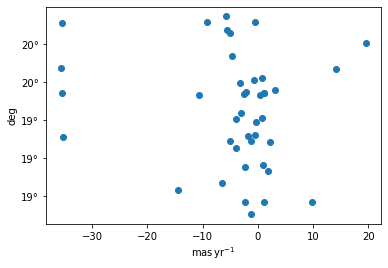

In [165]:
with quantity_support():
    plt.plot(results1_qt['pmra'], results1_qt['dec'], 'o')

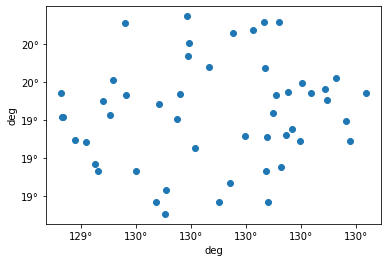

In [167]:
with quantity_support():
    plt.plot(results1_qt['ra'], results1_qt['dec'], 'o')

In [177]:
from astropy.coordinates import Angle

ra = Angle(results1['ra'])
dec = Angle(results1['dec'])

<Angle [19.980541  , 19.9937472 , 19.98862141, ..., 19.49071277,
        19.48850404, 19.48753301] deg>

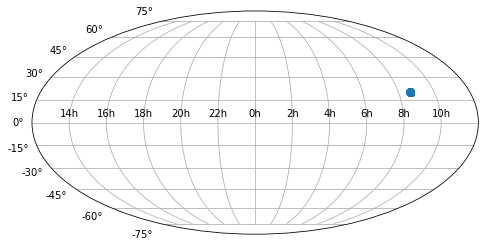

In [180]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

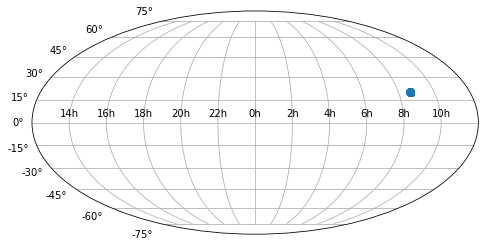

In [183]:
from astropy.coordinates import SkyCoord

coord = SkyCoord(results1['ra'], results1['dec'])

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(coord.ra.radian, coord.dec.radian)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

In [49]:
with quantity_support():
    plt.plot(coord.ra, coord.dec, 'o')

NameError: name 'quantity_support' is not defined

# Compute galactocentric coordinates
https://docs.astropy.org/en/stable/generated/examples/coordinates/plot_galactocentric-frame.html


In [124]:
from astropy.coordinates import SkyCoord, Galactocentric

In [161]:
selection = (results1['parallax'] > 5.0) & (results1['parallax'] < 5.7)
cluster = results1[selection].to_pandas()

In [162]:
cluster.columns

Index(['dist', 'solution_id', 'DESIGNATION', 'source_id', 'random_index',
       'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax',
       'parallax_error', 'parallax_over_error', 'pmra', 'pmra_error', 'pmdec',
       'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr',
       'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
       'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al',
       'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_params_solved',
       'astrometric_primary_flag', 'astrometric_weight_al',
       'astrometric_pseudo_colour', 'astrometric_pseudo_colour_error',
       'mean_varpi_factor_al', 'astrometric_matched_observations',
       'visibility_periods_used', 'astrometric_sigma5d_max',
       'frame_rotator_objec

In [130]:
ra_median = cluster['ra'].median()
dec_median = cluster['dec'].median()
parallax_median = cluster['parallax'].median()
pm_ra_median = cluster['pmra'].median()  # check cosdec?
pm_de_median = cluster['pmdec'].median()
pm_rv_median = cluster['radial_velocity'].median()

print('Average values for the cluter:')
print('Right Ascension: {0:7.3f} deg'.format(ra_median))
print('Declination:     {0:7.3f} deg'.format(dec_median))
print('Parallax:        {0:7.3f} mas'.format(parallax_median))

ra_median, dec_median, parallax_median, pm_ra_median, pm_de_median, pm_rv_median

Average values for the cluter:
Right Ascension: 130.065 deg
Declination:      19.933 deg
Parallax:          5.356 mas


(130.06529528119498,
 19.932944309253983,
 5.355577500320106,
 -36.00163972660106,
 -13.103434885558013,
 34.868167437602224)

In [131]:
(parallax_median*u.mas).to(u.pc, u.parallax())

<Quantity 186.7212266 pc>

In [122]:
c1 = SkyCoord(ra=ra_median*u.degree, dec=dec_median*u.degree,
                    distance=(parallax_median*u.mas).to(u.pc, u.parallax()),
                    pm_ra_cosdec=pm_ra_median*u.mas/u.yr,
                    pm_dec=pm_de_median*u.mas/u.yr,
                    radial_velocity=pm_rv_median*u.km/u.s,
                    frame='icrs')
c1

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (130.06529528, 19.93294431, 186.7212266)
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    (-36.00163973, -13.10343489, 34.86816744)>

In [133]:
v_sun = [11.1, 244, 7.25] * (u.km / u.s)  # [vx, vy, vz]
gc_frame = Galactocentric(
    galcen_distance=8*u.kpc,
    galcen_v_sun=v_sun,
    z_sun=0*u.pc)

In [ ]:
gc2 = c1.transform_to(gc_frame)
print(gc2.v_x, gc2.v_y, gc2.v_z)


-31.886642727201245 km / s 223.4731485626047 km / s -2.578446652512869 km / s


In [137]:
gc1.z.to(u.km)

<Quantity 3.7525945e+15 km>

In [126]:
gc1 = c1.transform_to(Galactocentric)
print(gc1.v_x, gc1.v_y, gc1.v_z)

-30.111671881275004 km / s 225.0731485626047 km / s -1.938327970122827 km / s


In [127]:
print(gc1.x, gc1.y, gc1.z)

-8263.651963510032 pc -68.03432179627598 pc 121.61330548195235 pc


In [129]:
(gc1.z/gc1.v_z).to(u.yr)

<Quantity -61347999.91851094 yr>

In [191]:
from astroquery.vizier import Vizier
soubiran18_text = 'J/A+A/619/A155/oc'
Vizier.ROW_LIMIT = -1
soubiran18 = Vizier.get_catalogs(soubiran18_text)[0]

In [197]:
soubiran18[0:5]

ID,ID2,RA_ICRS,DE_ICRS,dmode,Nmemb,Nsele,RV,e_RV,s_RV,X,e_X,Y,e_Y,Z,e_Z,U,e_U,V,e_V,W,e_W,Vr,e_Vr,Vphi,e_Vphi,Vz,e_Vz,SimbadName
,,deg,deg,pc,,,km / s,km / s,km / s,pc,pc,pc,pc,pc,pc,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,
str20,str20,float32,float32,float32,int16,int16,float32,float32,float32,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str21
ASCC_10,[KPS2012] MWSC 0275,51.870,34.981,672.0,4,2,-15.67,1.16,1.63,-8923.4,5.1,263.1,2.3,-191.1,1.8,16.27,1.01,-5.24,0.46,-1.67,0.36,-20.08,1.02,247.70,0.43,5.58,0.36,[KPS2012] MWSC 0275
ASCC_101,[KPS2012] MWSC 3070,288.399,36.369,397.3,17,15,-20.17,0.92,3.56,-8194.4,0.5,360.9,1.1,93.9,0.3,-10.08,0.34,-17.12,0.84,-4.60,0.19,9.33,0.31,234.94,0.85,2.65,0.19,[KPS2012] MWSC 3070
ASCC_105,[KPS2012] MWSC 3157,295.548,27.366,551.8,24,20,-13.81,0.50,2.23,-8088.1,0.8,490.6,1.6,33.9,0.1,-4.59,0.23,-12.93,0.45,-5.94,0.06,7.99,0.21,239.26,0.46,1.31,0.06,[KPS2012] MWSC 3157
ASCC_108,[KPS2012] MWSC 3201,298.306,39.349,1154.0,2,1,-6.33,2.10,0.00,-8031.0,1.1,1105.1,3.8,136.1,0.4,7.43,0.56,-8.37,2.01,-2.88,0.23,14.89,0.30,244.12,2.07,4.37,0.23,[KPS2012] MWSC 3201
ASCC_11,[KPS2012] MWSC 0284,53.056,44.856,854.5,3,3,-14.43,0.32,0.56,-9074.4,2.5,414.8,1.4,-123.0,0.5,8.48,0.28,-16.49,0.16,-5.38,0.08,-8.79,0.29,236.39,0.15,1.87,0.08,[KPS2012] MWSC 0284


In [203]:
#Alternative 
#soubiran18[soubiran18['SimbadName'] == '[KPS2012] MWSC 2632']

In [229]:
# https://docs.astropy.org/en/stable/coordinates/matchsep.html#matching-catalogs
cluster_center = SkyCoord(ra=np.mean(results1['ra'])*u.deg, dec=np.mean(results1['dec'])*u.deg, frame='icrs') # Change to cluster
catalog = SkyCoord(ra=soubiran18['RA_ICRS'], dec=soubiran18['DE_ICRS'])

idx, d2d, d3d = cluster_center.match_to_catalog_sky(catalog)
idx

array(533)

In [230]:
soubiran18[idx]

ID,ID2,RA_ICRS,DE_ICRS,dmode,Nmemb,Nsele,RV,e_RV,s_RV,X,e_X,Y,e_Y,Z,e_Z,U,e_U,V,e_V,W,e_W,Vr,e_Vr,Vphi,e_Vphi,Vz,e_Vz,SimbadName
,,deg,deg,pc,,,km / s,km / s,km / s,pc,pc,pc,pc,pc,pc,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,
str20,str20,float32,float32,float32,int16,int16,float32,float32,float32,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str21
NGC_2632,[KPS2012] MWSC 1527,130.054,19.621,185.5,191,186,34.72,0.08,1.10,-8480.8,0.1,-68.5,0.1,113.5,0.1,-42.76,0.07,-20.41,0.04,-9.83,0.06,29.79,0.07,232.08,0.04,-2.58,0.06,[KPS2012] MWSC 1527


# Work with galacocentric coordinates

In [168]:
results1
cluster = results1[selection]
cluster

dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,solRad,solRad,solRad,solLum,solLum,solLum,
float64,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object
0.02445630792133449,1635721458409799680,Gaia DR2 661324431287688448,661324431287688448,788166040,2015.5,130.02657947132394,0.043558763357000686,20.00773569688166,0.03099984816650081,5.316194371046439,0.05892472792863759,90.22009,-35.60957552754509,0.08754513933765422,-11.963702152166118,0.055136721474611516,-0.41975328,-0.1358385,-0.22184417,0.4538053,-0.111287355,0.215826,-0.48650834,0.62542593,-0.25465265,-0.3871421,220,220,212,8,7.091365,386.3978,0.0,0.0,31,True,316.96573,1.5727062771431164,0.009477604151890891,-0.008497519,25,12,0.056965407,0,37,False,291,66232823.59961401,20482.763922214683,3233.5881,6.1356826,29,30612233.464896858,50147.45191680208,610.44446,6.6366506,29,49206886.48189549,95742.81356889517,513.9486,5.531855,1.2051294,0,1.1047955,0.500968,0.6038275,34.1410282196341,0.14830496348234412,13,5000.0,2.5,0.25,NOT_AVAILABLE,205.51166437920656,32.53709222672014,127.1971240804592,1.5873587768058746,100001,5047.947,4981.25,5098.27,--,--,--,--,--,--,200111,13.151215,12.892875,13.505751,101.17787,99.69645,102.659294,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+661324431287688448
0.02447974121342088,1635721458409799680,Gaia DR2 661322060465742336,661322060465742336,1182878022,2015.5,130.04755822939757,0.05087222973848031,19.97107625044161

In [169]:
c1 = SkyCoord(ra=results1['ra'],
              dec=results1['dec'],
              pm_ra_cosdec=results1['pmra'],
              pm_dec=results1['pmdec'],
              frame='icrs')
c1_gal = c1.galactic
cluster_coord = SkyCoord(ra=cluster['ra'],
               dec=cluster['dec'],
               pm_ra_cosdec=cluster['pmra'],
               pm_dec=cluster['pmdec'],
               frame='icrs')
cluster_gal = cluster_coord.galactic



In [170]:
c1_gal

<SkyCoord (Galactic): (l, b) in deg
    [(205.53753328, 32.51753891), (205.52321354, 32.52297246),
     (205.52588609, 32.5142118 ), ..., (206.28027692, 32.79828692),
     (206.2820192 , 32.79588204), (206.28285404, 32.79498114)]
 (pm_l_cosb, pm_b) in mas / yr
    [(-4.12403813, -2.78579716), ( 1.72832031, -3.4056621 ),
     (        nan,         nan), ..., (-1.18571216, -3.65535171),
     ( 6.51813031, -3.1113447 ), (21.39128915, -4.64123967)]>

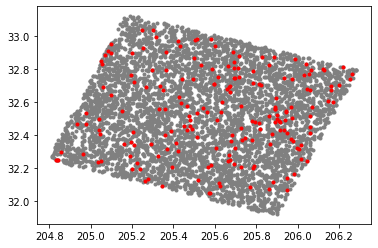

In [175]:
plt.plot(c1_gal.l, c1_gal.b, '0.5', marker='.', ls='')
plt.plot(cluster_gal.l, cluster_gal.b, 'r.')

(-60.0, 50.0)

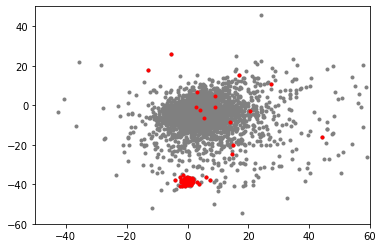

In [179]:
plt.plot(c1_gal.pm_l_cosb, c1_gal.pm_b, '0.5', marker='.', ls='')
plt.plot(cluster_gal.pm_l_cosb, cluster_gal.pm_b, 'r.')
plt.xlim(-50, 60)
plt.ylim(-60,50)

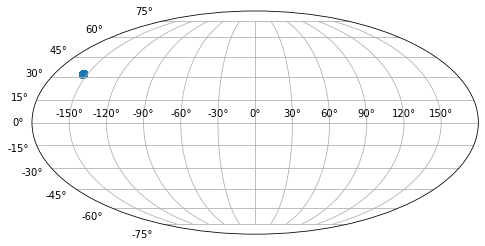

In [243]:
from astropy.coordinates import Angle

l_cluster = Angle(cluster_gal.l)
b_cluster = Angle(cluster_gal.b)
l_cluster = l_cluster.wrap_at('180d') # Angle should be between -180d and 180d


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(l_cluster.radian, b_cluster.radian)
ax.grid(True)